# Evaluación - Aprendizaje NO supervisado

**Integrante 1:**
+   Jonathan Olivares Garces

**Integrante 2:**
+   Cristobal Betancurt Palma

**Correo Electrónico integrante 1:**
+   Jonathan.Olivares2101@alumnos.ubiobio.cl

**Correo Electrónico integrante 2:**
+   Cristobal.Betacurt2101@alumnos.ubiobio.cl

---

## Descripción

Este notebook contiene la evaluación asociada al tópico de aprendizaje NO supervisado de la asignatura de Inteligencia Artificial de la carrera de Ingeniería Civil en informática de la UBB.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)
- kneed-0.8.5

# Descripción de los datos

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

Fair, Ray. 1978. “A Theory of Extramarital Affairs,” Journal of Political Economy, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

In [ ]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv

--2024-11-12 13:16:49--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/affairs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286041 (279K) [text/plain]
Saving to: ‘affairs.csv’

affairs.csv         100%[===================>] 279.34K  --.-KB/s    in 0.04s   

2024-11-12 13:16:50 (7.21 MB/s) - ‘affairs.csv’ saved [286041/286041]



In [4]:
!pip install kneed


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.base import TransformerMixin

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carga de datos

In [2]:
data_affair = pd.read_csv("affairs.csv")
data_affair.shape

(6366, 10)

# Análisis preliminar de los datos

In [6]:
data_affair.head(10)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


#####  Primeros 10 datos 

In [7]:
data_affair.describe()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,3182.500000,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,1837.850239,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,1591.250000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,3182.500000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,4773.750000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,6365.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


#### Descripcion mas detallada de los datos incluyendo la cantidad que posee cada variable su mean std min y sus cuartiles

In [9]:
data_affair.dtypes

Unnamed: 0           int64
rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object

#### se muestra que las 10 variables son cuantitativas

In [10]:
data_affair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


#### No existen valores nulos

## Analisis Rate Marriage

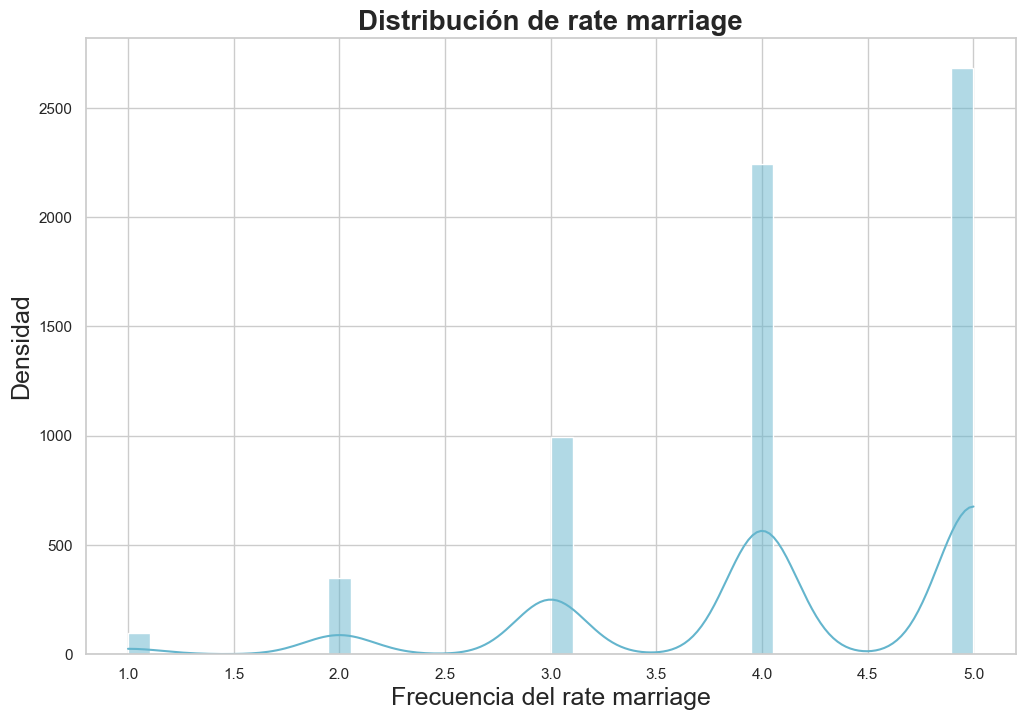

In [39]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['rate_marriage'], kde = True, color = 'c')
plt.title('Distribución de rate marriage', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del rate marriage", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [40]:
pd.DataFrame(data_affair.rate_marriage.describe()).T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.96143,1.0,4.0,4.0,5.0,5.0


In [41]:
pd.DataFrame(data_affair['rate_marriage'].value_counts())

,count
rate_marriage,
5.0,2684
4.0,2242
3.0,993
2.0,348
1.0,99


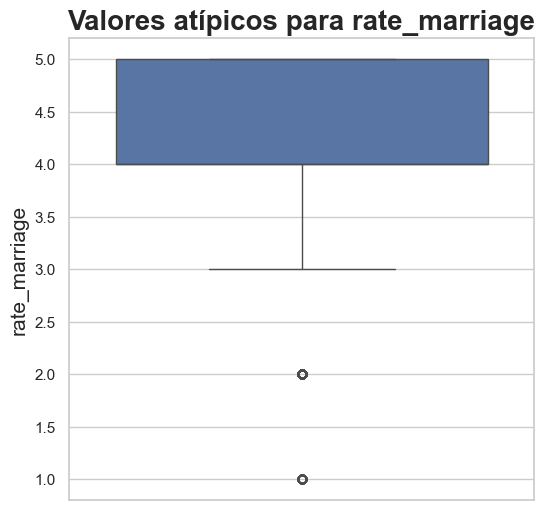

In [42]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para rate_marriage", fontsize=20, fontweight="bold")
plt.ylabel("rate_marriage", fontsize=15)
sns.boxplot(y='rate_marriage',data=data_affair);

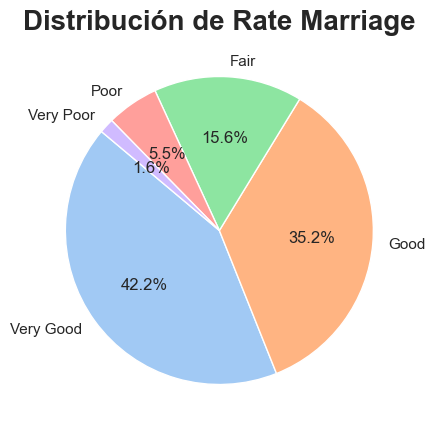

In [43]:
# Contar los valores de rate_marriage
rate_marriage_counts = data_affair['rate_marriage'].value_counts()

# Definir las etiquetas
labels = ['Very Good', 'Good', 'Fair', 'Poor', 'Very Poor']

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(rate_marriage_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Rate Marriage', fontsize=20, fontweight="bold")
plt.show()

### Comentarios acerca de rate marriage
+   El 42.2% de los individuos califican su matrimonio como "Buy Bueno"
+   Solo el 1.6% de individuos califican su matrimonio como "Muy Malo"
+   Existen valores atipicos
+   Las calificaciones predominantes son de "Very Good" y "Good"

## Analisis Age

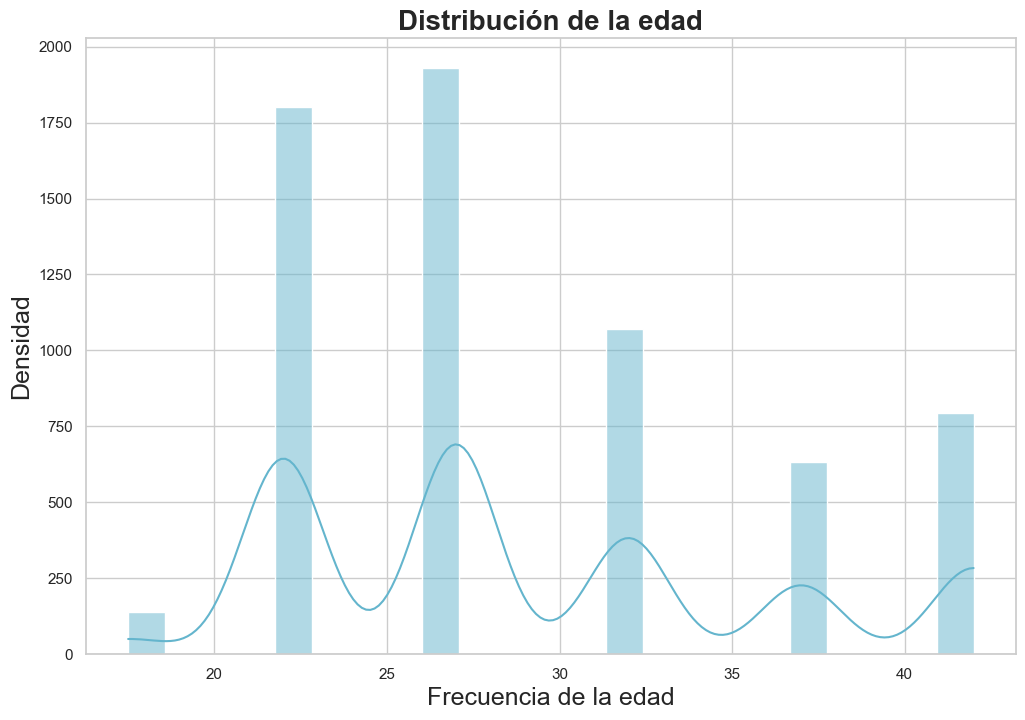

In [30]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['age'], kde = True, color = 'c')
plt.title('Distribución de la edad', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia de la edad", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [34]:
pd.DataFrame(data_affair.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.0,42.0


In [35]:
pd.DataFrame(data_affair['age'].value_counts())

,count
age,
27.0,1931
22.0,1800
32.0,1069
42.0,793
37.0,634
17.5,139


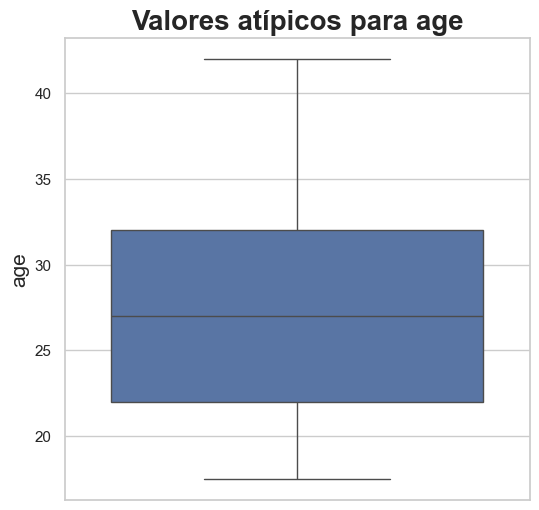

In [33]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para age", fontsize=20, fontweight="bold")
plt.ylabel("age", fontsize=15)
sns.boxplot(y='age',data=data_affair);

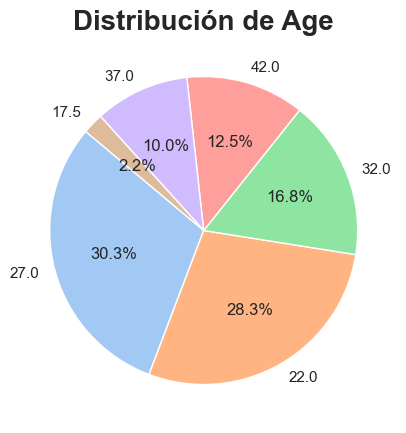

In [ ]:
# Contar los valores de age
age_counts = data_affair['age'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Age', fontsize=20, fontweight="bold")
plt.show()

### Comentarios acerca de la edad de los individuos 
+   La mayor edad que presenta un individuo es de 42 años
+   La mayoria de los individuos poseen 27 años (30.3%)
+   El valor promedio de edad es de 29 
+   El individuo con menos edad es de 17 años
+   Existen valores atipicos (outliers)

## Analisis yrs_married

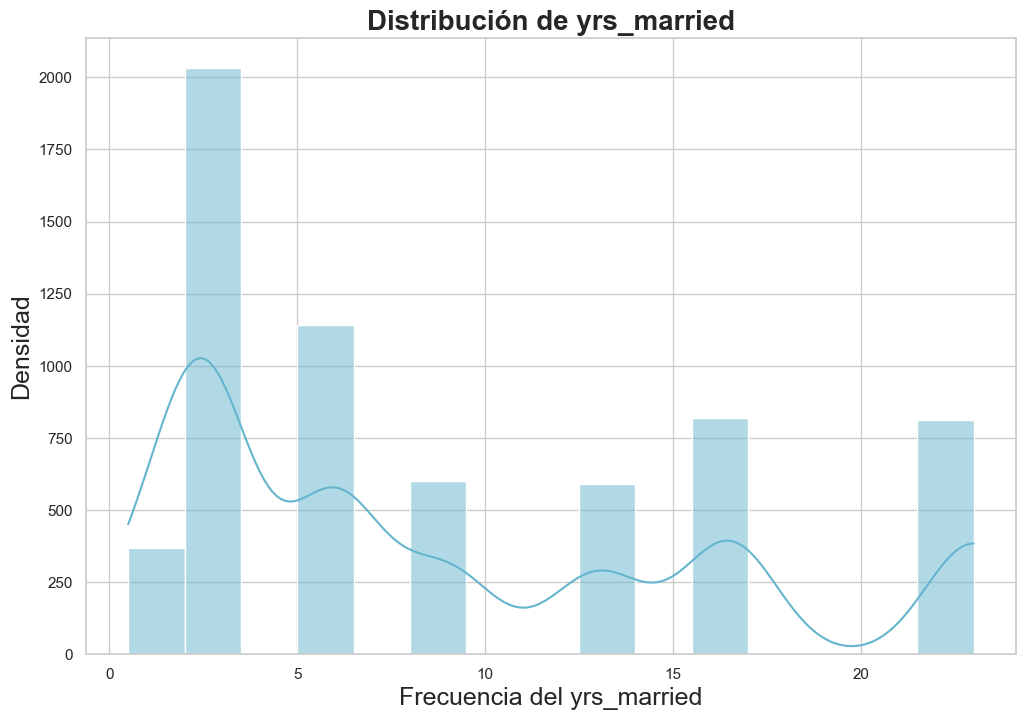

In [53]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['yrs_married'], kde = True, color = 'c')
plt.title('Distribución de yrs_married', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del yrs_married", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [54]:
pd.DataFrame(data_affair.yrs_married.describe()).T

,count,mean,std,min,25%,50%,75%,max
yrs_married,6366.0,9.009425,7.28012,0.5,2.5,6.0,16.5,23.0


In [55]:
pd.DataFrame(data_affair['yrs_married'].value_counts())

,count
yrs_married,
2.5,2034
6.0,1141
16.5,818
23.0,811
9.0,602
13.0,590
0.5,370


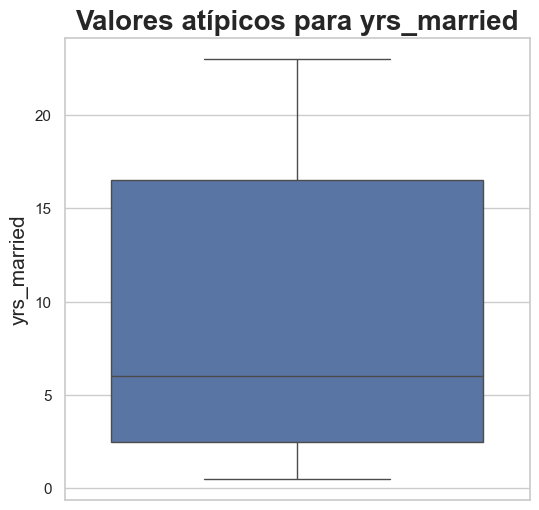

In [56]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para yrs_married", fontsize=20, fontweight="bold")
plt.ylabel("yrs_married", fontsize=15)
sns.boxplot(y='yrs_married',data=data_affair);

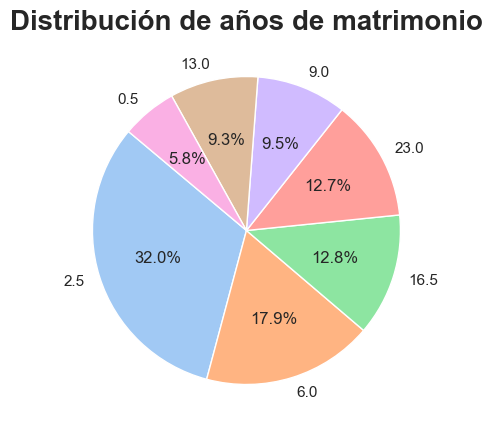

In [64]:
# Contar los valores de age
yrs_married__counts = data_affair['yrs_married'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(yrs_married__counts, labels=yrs_married__counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de años de matrimonio', fontsize=20, fontweight="bold")
plt.show()

### Comentarios sobre Años de matrimonio
+   La mayoria de los individuos poseen 2.5 años de matrimonio
+   La minima de individuos poseen 0.5 años de matrimonio 
+   Los individuos con la mayor cantidad de años de matrimonio cuentan con 16.5 años
+   Los individuos con el menos tiempo de matrimonio son de 0.5 años 
+   La media de años de matrimonio es de 9 años 
+   No hay valores atipicos(outliers)

## Analisis para children

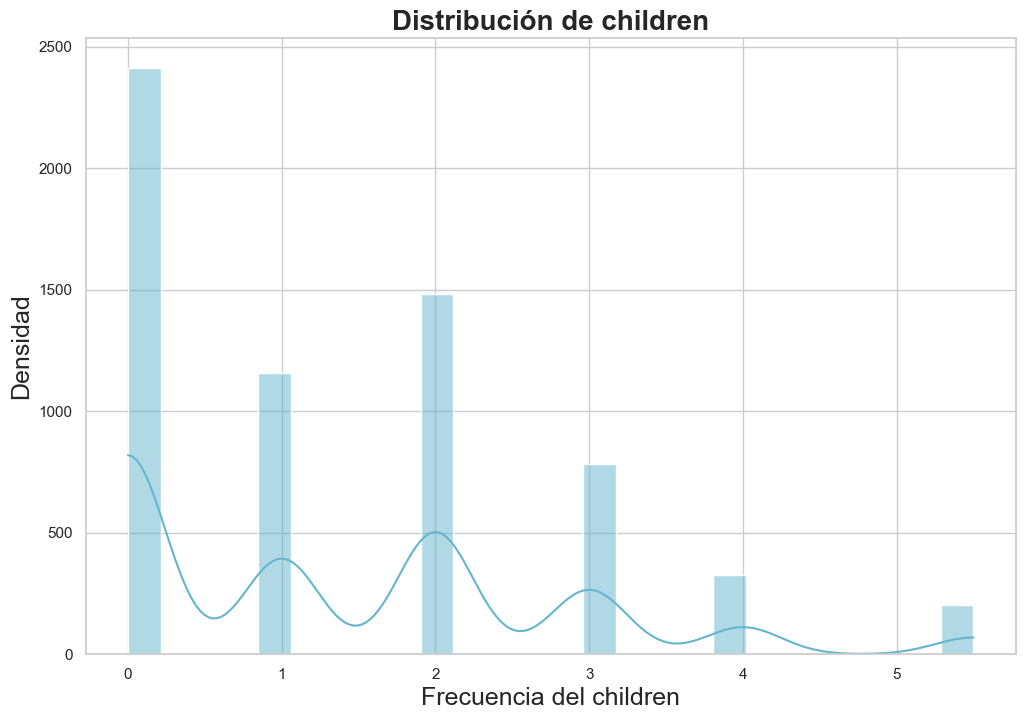

In [58]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(data_affair['children'], kde = True, color = 'c')
plt.title('Distribución de children', fontsize = 20, fontweight="bold")
plt.xlabel("Frecuencia del children", fontsize=18)
plt.ylabel("Densidad", fontsize=18)
plt.show()

In [60]:
pd.DataFrame(data_affair.children.describe()).T

,count,mean,std,min,25%,50%,75%,max
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.0,5.5


In [61]:
pd.DataFrame(data_affair['children'].value_counts())

,count
children,
0.0,2414
2.0,1481
1.0,1159
3.0,781
4.0,328
5.5,203


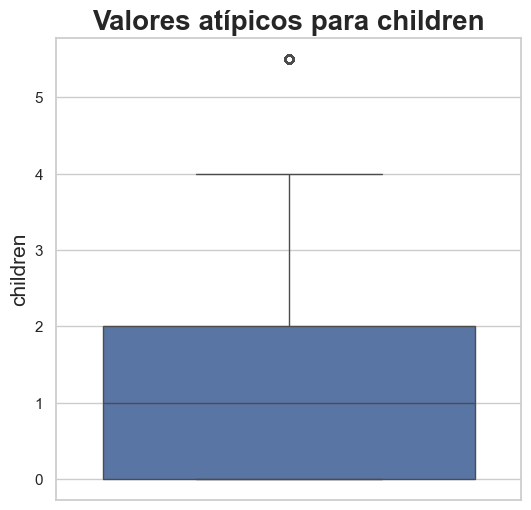

In [62]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para children", fontsize=20, fontweight="bold")
plt.ylabel("children", fontsize=15)
sns.boxplot(y='children',data=data_affair);

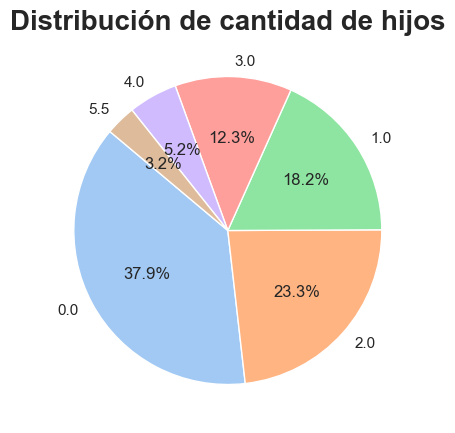

In [63]:
# Contar los valores de age
children_counts = data_affair['children'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de cantidad de hijos', fontsize=20, fontweight="bold")
plt.show()

### Comentarios sobre la cantidad de hijos
+   Los individuos con mayor cantidad de hijos poseen 5.5 hijos
+   Los individuos con menor cantidad de hijos posee 0 hijos (37.9%)
+   La media de hijos es de 1.3 = 1 hijo
+   Existen valores atipicos(outliers)

# Modelos de segmentación

In [ ]:
features = data_affair.drop(columns='Unnamed: 0').columns
X = data_affair[features]


In [79]:
X.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [92]:
model_kmeans = KMeans(n_clusters = 5, random_state=29)
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=29)

In [95]:
# Muestra los % de ocurrencias de cada clase considerando la agrupación que hizo el modelo de segmentación
count_0 = list(model_kmeans.labels_).count(0)
count_1 = list(model_kmeans.labels_).count(1)
count_2 = list(model_kmeans.labels_).count(2)
count_3 = list(model_kmeans.labels_).count(3)
count_4 = list(model_kmeans.labels_).count(4)

percentaje_0 = (count_0 / len(model_kmeans.labels_)) * 100
percentaje_1 = (count_1 / len(model_kmeans.labels_)) * 100
percentaje_2 = (count_2 / len(model_kmeans.labels_)) * 100
percentaje_3 = (count_3 / len(model_kmeans.labels_)) * 100
percentaje_4 = (count_4 / len(model_kmeans.labels_)) * 100

print("Individuos Grupo 1 {0} que representa un {1:.1f}%".format(count_0, percentaje_0))
print("Individuos Grupo 2 {0} que representa un {1:.1f}%".format(count_1, percentaje_1))
print("Individuos Grupo 3 {0} que representa un {1:.1f}%".format(count_2, percentaje_2))
print("Individuos Grupo 4 {0} que representa un {1:.1f}%".format(count_3, percentaje_3))
print("Individuos Grupo 5 {0} que representa un {1:.1f}%".format(count_4, percentaje_4))


Individuos Grupo 1 393 que representa un 6.2%
Individuos Grupo 2 1819 que representa un 28.6%
Individuos Grupo 3 889 que representa un 14.0%
Individuos Grupo 4 1935 que representa un 30.4%
Individuos Grupo 5 1330 que representa un 20.9%


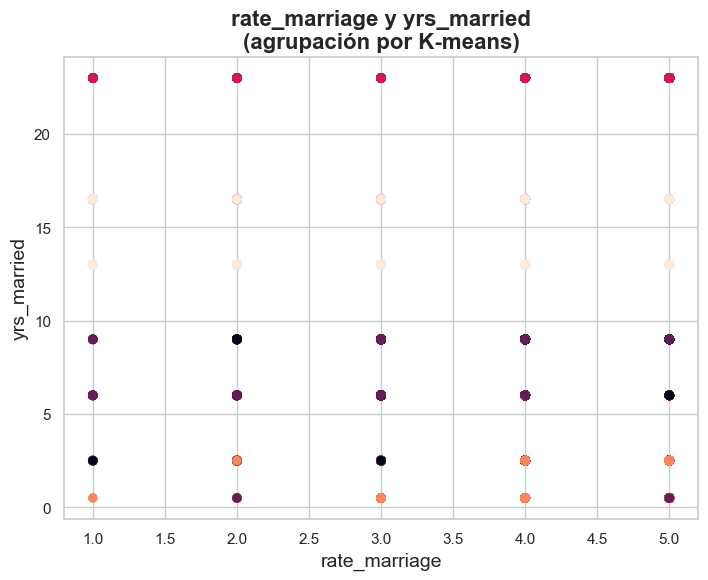

In [104]:
# Configuración de la figura
plt.figure(figsize=(18, 6))

# Primer gráfico: agrupamiento usando K-means
plt.subplot(1, 2, 1)
plt.scatter(X.rate_marriage, X.yrs_married, c=model_kmeans.labels_)
plt.title("rate_marriage y yrs_married\n(agrupación por K-means)", fontsize=16, fontweight="bold")
plt.xlabel("rate_marriage", fontsize=14)
plt.ylabel("yrs_married", fontsize=14)

# Ajuste y visualización
plt.show()

In [105]:
# Consolida los datos considerando el resultado de kmeans
grouped_data = pd.DataFrame(X, columns = X.columns)
grouped_data['grupo'] = model_kmeans.labels_

In [108]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 0][['rate_marriage', 'yrs_married']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,393.0,4.099237,0.935591,1.0,4.0,4.0,5.0,5.0
yrs_married,393.0,6.937659,2.591057,0.5,6.0,9.0,9.0,9.0


In [109]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 1][['rate_marriage', 'yrs_married']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,1819.0,4.129192,0.912762,1.0,4.0,4.0,5.0,5.0
yrs_married,1819.0,5.346069,2.514195,0.5,2.5,6.0,6.0,9.0


In [110]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 2][['rate_marriage', 'yrs_married']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,889.0,3.933633,1.109482,1.0,3.0,4.0,5.0,5.0
yrs_married,889.0,22.363892,1.932426,16.5,23.0,23.0,23.0,23.0


In [111]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 3][['rate_marriage', 'yrs_married']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,1935.0,4.245478,0.876086,1.0,4.0,4.0,5.0,5.0
yrs_married,1935.0,2.626873,1.484773,0.5,2.5,2.5,2.5,9.0


In [112]:
# Resumen estadístico de los datos agrupados
grouped_data[grouped_data.grupo == 4][['rate_marriage', 'yrs_married']].describe().T

,count,mean,std,min,25%,50%,75%,max
rate_marriage,1330.0,4.006015,1.015290,1.0,3.0,4.0,5.0,5.0
yrs_married,1330.0,14.991353,1.856526,13.0,13.0,16.5,16.5,23.0


# Análisis de los grupos

### Análisis usando normalización

In [ ]:
# Escriba su código acá

# Comentarios finales